In [198]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from regression import LogReg
from regression import KNN
from ucimlrepo import fetch_ucirepo 

In [199]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

In [200]:
# Cleaned y, replaced odd entries with the correct values
y.replace(['>50K.', '<=50K.'], ['>50K', '<=50K'], inplace=True)
y

C:\Users\ferna\AppData\Local\Temp\ipykernel_31760\1656004078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace(['>50K.', '<=50K.'], ['>50K', '<=50K'], inplace=True)


,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K
48838,<=50K
48839,<=50K
48840,<=50K


In [201]:
# Converted binary categorical variable to booleans
y.replace(['>50K', '<=50K'], [1,0], inplace=True)
X['sex'].replace(['Male', 'Female'], [1,0], inplace=True)

C:\Users\ferna\AppData\Local\Temp\ipykernel_31760\4237452302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace(['>50K', '<=50K'], [1,0], inplace=True)
C:\Users\ferna\AppData\Local\Temp\ipykernel_31760\4237452302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'].replace(['Male', 'Female'], [1,0], inplace=True)


In [202]:
# Combines X and y dataframes to make cleaning both easier
joined = X.join(y)
joined

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,0,0,0,36,United-States,0
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,1,0,0,40,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,1,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,1,5455,0,40,United-States,0


In [203]:
# removes missing rows from X and y
cleaned = joined.dropna()

In [204]:
# removes duplicate rows from X and y
cleaned = cleaned.drop_duplicates(ignore_index=False)
cleaned

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,1,0,0,40,United-States,0
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,0,0,0,36,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,1,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,1,5455,0,40,United-States,0


In [205]:
# Found and removed unusual entry '?' in workclass
# cleaned.drop_duplicates('workclass')
cleaned = cleaned[cleaned['workclass'] != '?']

In [206]:
# Found and removed unusual entry '?' in occupation
# cleaned.drop_duplicates('occupation')
cleaned = cleaned[cleaned['occupation'] != '?']

In [207]:
# Found and removed unusual entry '?' in native-country
# cleaned.drop_duplicates('native-country')
cleaned = cleaned[cleaned['native-country'] != '?']

In [208]:
# Looking for unusual int values. None detected.
# cleaned[(cleaned['capital-gain'] < 0)]
# cleaned[(cleaned['capital-loss'] < 0)]
# cleaned[(cleaned['hours-per-week'] < 0)]
# cleaned[(cleaned['age'] < 0)]
cleaned

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,1,0,0,40,United-States,0
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,0,0,0,36,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,1,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,1,5455,0,40,United-States,0


In [209]:
# One-hot-encoded all categorical vars
joined = pd.get_dummies(joined, columns = ['workclass', 'education', 'marital-status', 'occupation',
                             'relationship', 'race', 'native-country'])
joined

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,1,2174,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,1,0,0,13,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,13,0,0,0,36,0,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,64,321403,9,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,38,374983,13,1,0,0,50,0,False,False,...,False,False,False,False,False,False,False,True,False,False
48840,44,83891,13,1,5455,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [210]:
# Separate X and y
y_cleaned = joined['income']
X_cleaned = joined.drop('income', axis='columns')

In [211]:
# Convert to array
y= np.array(y_cleaned)
X = np.array(X_cleaned)
X=X.astype(int)
print(X)

[[    39  77516     13 ...      1      0      0]
 [    50  83311     13 ...      1      0      0]
 [    38 215646      9 ...      1      0      0]
 ...
 [    38 374983     13 ...      1      0      0]
 [    44  83891     13 ...      1      0      0]
 [    35 182148     13 ...      1      0      0]]


In [212]:


lr = LogReg(learning_rate=0.0000000001, num_epochs=100)
losses = lr.fit(X, y)

accuracy_LogReg = lr.evaluate_acc(X, y)
print('log regression Accuracy: ', accuracy_LogReg)

Epoch: 0, Loss: 0.6931471805599435
Epoch: 1, Loss: 0.5813510634660046
Epoch: 2, Loss: 0.581348770933395
Epoch: 3, Loss: 0.5813485916086018
Epoch: 4, Loss: 0.5813485774584188
Epoch: 5, Loss: 0.5813485763389076
Epoch: 6, Loss: 0.5813485762500477
Epoch: 7, Loss: 0.5813485762427651
Epoch: 8, Loss: 0.5813485762419413
Epoch: 9, Loss: 0.5813485762416286
Epoch: 10, Loss: 0.5813485762413565
Epoch: 11, Loss: 0.5813485762410875
Epoch: 12, Loss: 0.5813485762408188
Epoch: 13, Loss: 0.58134857624055
Epoch: 14, Loss: 0.5813485762402815
Epoch: 15, Loss: 0.5813485762400128
Epoch: 16, Loss: 0.5813485762397441
Epoch: 17, Loss: 0.5813485762394754
Epoch: 18, Loss: 0.5813485762392068
Epoch: 19, Loss: 0.5813485762389382
Epoch: 20, Loss: 0.5813485762386694
Epoch: 21, Loss: 0.5813485762384009
Epoch: 22, Loss: 0.5813485762381321
Epoch: 23, Loss: 0.5813485762378633
Epoch: 24, Loss: 0.5813485762375947
Epoch: 25, Loss: 0.581348576237326
Epoch: 26, Loss: 0.5813485762370574
Epoch: 27, Loss: 0.5813485762367887
Epoch:

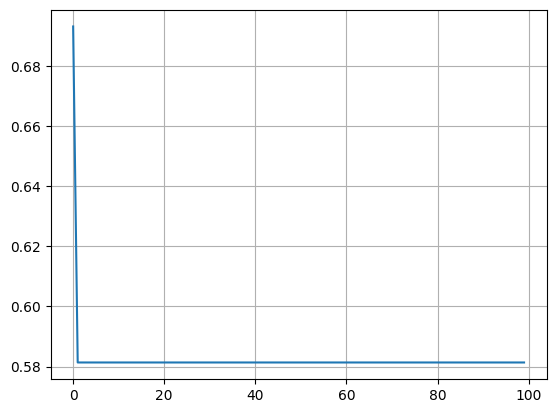

In [213]:
plt.figure()
plt.plot(losses)

plt.grid()

In [214]:
'''
knn = KNN(k=4)
accuracy_k_fold = KNN.k_fold_cross_validation(knn, X, y, k=5)
print("5-Fold Cross-Validation Accuracy:", accuracy_k_fold)

'''


'\nknn = KNN(k=4)\naccuracy_k_fold = KNN.k_fold_cross_validation(knn, X, y, k=5)\nprint("5-Fold Cross-Validation Accuracy:", accuracy_k_fold)\n\n'

In [215]:
'''
plt.grid()
plt.plot(accuracy_k_fold)
'''


'\nplt.grid()\nplt.plot(accuracy_k_fold)\n'